## Ice cream daily revenue 

The goal is to predict daily revenue in dollars based on the outside aire temperature (degC) for an ice cream business with ANN. 

---

In [1]:
# Import libraries 

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset

sales_df = pd.read_csv('~/Documents/GitHub/real-application/data//sales_ice.csv')
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
# Dataset information

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
# Dataset summary

sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


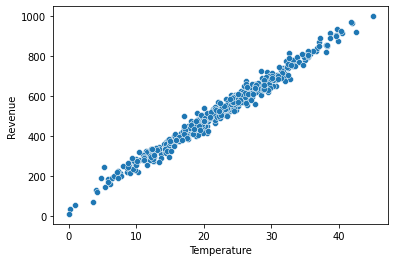

In [5]:
# Dataset vizualization

import warnings
warnings.filterwarnings("ignore")

sns.scatterplot(sales_df['Temperature'], sales_df['Revenue']);

In [6]:
# Training & testing dataset

X_train = sales_df['Temperature']
y_train = sales_df['Revenue']
print(X_train.shape)
print(y_train.shape)

(500,)
(500,)


In [7]:
# Build ANN model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7faa9a1cae20>>

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Complile the ANN model

model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [10]:
# Train ANN model

epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 276973.0000
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 238188.4062
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 202618.6250
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 171623.9531
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 143938.1250
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 120113.3047
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 99329.6406
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 81724.2422
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 66590.8828
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 53792.3945
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 43407.6094
Epoch 12/100
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 1ms/step - loss: 671.2140
Epoch 100/100
16/16 [==============================] - 0s 2ms/step - loss: 670.6929


In [11]:
# Evaluate the ANN model

epochs_hist.history.keys()

dict_keys(['loss'])

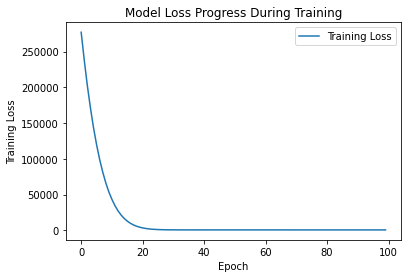

In [12]:
# Plot the loss function

plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [13]:
# The most important, weights of the ANN model

model.get_weights()

[array([[22.244339]], dtype=float32), array([24.703478], dtype=float32)]

In [14]:
# Use the trained model to perform predictions

Temp = 5
Revenue = model.predict([Temp])
print('Revenue Predictions Using Trained ANN =', Revenue)

Revenue Predictions Using Trained ANN = [[135.92517]]


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

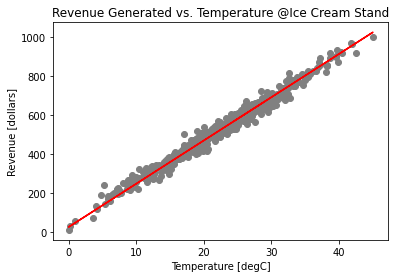

In [15]:
# The scatter plot

plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')

In [16]:
# Confirm, using regression kit in Scikit learn

# Reshape training dataset

X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
print(X_train.shape)
print(y_train.shape)

(500, 1)
(500, 1)


In [17]:
# Linear Regression model 

from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
# Print coefficient m, b

print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

Linear Model Coeff(m) [[21.44362551]]
Linear Model Coeff(b) [44.83126709]


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

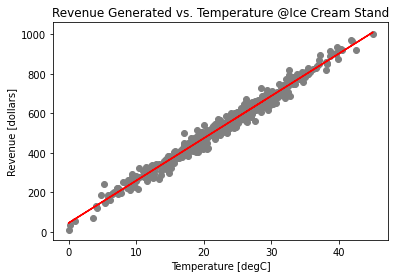

In [19]:
# The scatter plot 

plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')